## PCS5024 - Aprendizado Estatístico
 - Primeiro trimestre 2023 
 - Profs. Anna Helena Realli Costa e Fábio Gagliardi Cozman 
 - Aluno: Caio Azevedo - caio.aze@alumni.usp.br
 - Entrega em: 30.03.23

## Classification with the Adult dataset
To be handed until May 9 in edisciplinas: a write-up, five pages long at most, in pdf format, describing the results obtained in the following task:

1) Get the dataset Adult (either in the UCI Repository or in Kaggle).

2) Analyze features, missing data, and overall characteristics of the dataset (using tools in sklearn). Select features, discretize numerical features, handle missing data. 

3) Build a kNN classifier to predict class variable ">50k" (that is, whether person gets more than US$50k/year or not). Select the hyperparameter using cross-validation; test the final classifier using a holdout dataset.

4) Repeat (3) using three other classification techniques (for instance, neural network, classification tree, random forest, boosted trees, SVM, Naive Bayes).

5) Present accuracy, precision and recall for the best classifier in (3) and in (4).

## Trabalho 1 - Descrição
A entregar até 31/3 via edisciplinas: uma folha apenas (frente e verso) em formato pdf, contendo descrição concisa relativa às seguintes atividades:

1) Obtenha a base Adult (por exemplo no UCI Repository or no Kaggle). 

Recomendação: leia sobre o UCI Repository e o Kaggle, são recursos importantes.

2) Analise os atributos, dados faltantes, e características gerais da base Adult, usando ferramentas da sklearn. Selecione atributos, discretize atributos numéricos, processe dados faltantes. Se possível use Jupyter para desenvolver seu trabalho.

3) Construa um classificador para a variável ">50k" da base Adult (ou seja, se a pessoa ganha mais do que US$50k por ano ou não). Use um classificador Nearest Neighbour com seleção de hiperparâmetro via validação cruzada; se preferir, divida a base de treino em duas partes respectivamente para treino e validação. 

5) Apresente acurácia, precisão e revocação do melhor classificador Nearest Neighbour obtido.

6) Ponto extra: teste um classificador Naive Bayes para a mesma variável com os mesmos atributos.

## Objetivo
 - Análise para classificação das pessoas que ganham mais de U$50k por ano. 
 - **Projeto Classificação Binária**

## Sobre o dataset

### Características descritivas
| Data Set Characteristics | Number of Instances | Attribute Characteristics | Number of Attributes | Associated Tasks | Missing Values? 
| --- | --- | --- | --- | --- | --- 
| Multivariate | 48842 | Categorical, Integer | 14 | Classification | Yes 

### Sobre os atributos

- **salary** (target): >50K, <=50K.

- **age**: continuous.
- **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- **fnlwgt**: continuous.
- **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, - -  - Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- **education-num**: continuous.
- **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- **sex**: Female, Male.
- **capital-gain**: continuous.
- **capital-loss**: continuous.
- **hours-per-week**: continuous.
- **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

## Referências:
 - https://archive.ics.uci.edu/ml/datasets/adult
 - https://archive.ics.uci.edu/ml/machine-learning-databases/adult/
 - http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html
 - http://www.cs.toronto.edu/~delve/data/adult/desc.html
 - https://www.scaler.com/topics/data-science/categorical-missing-values/ 
 
 
 **Sobre balanceamento e classificação**
 - https://machinelearningmastery.com/imbalanced-classification-with-the-adult-income-dataset/
 - https://medium.com/analytics-vidhya/handle-missing-values-in-categorical-features-b7c5b073dda2
 **Sobre os modelos**
 - https://realpython.com/knn-python/

 boas implementações
 - https://www.kaggle.com/code/bhupendrarajput/complete-eda-and-machine-learning
 - https://arxiv.org/ftp/arxiv/papers/1810/1810.10076.pdf
 - https://github.com/itdxer/adult-dataset-analysis

## Implementação

### Importação bibliotecas

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [3]:
import os, sys
import pandas as pd
from sklearn.model_selection import train_test_split
import missingno as msno
from sklearn.impute import SimpleImputer
%matplotlib inline

In [4]:
from functools import partial
from collections import defaultdict

import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn import metrics

### Constantes

In [5]:
#'https://raw.githubusercontent.com/Bhupendra1770/Adult-Census-Income-Prediction/main/adult.csv'
APP_PATH = os.getcwd()
DATA_DIR = os.path.join(APP_PATH, 'data')
TRAIN_DATA_FILE = os.path.join(DATA_DIR, 'adult.data.csv')
TEST_DATA_FILE = os.path.join(DATA_DIR, 'adult.test.csv')
target_column = "income"

### Considerações para implementação do classificador

- O atributo fnlwgt será removido para implementação da classificação, seja porque sua definição não agrega valor à predição, seja pela análise estatística que provou sua baixa correlação ao atributo target.
- O atributo education-num também será removido pois seu valor já está representado com o atributo education
- O atributo native-country será transformado em um atributo binário chamado fromUS, cujo valor será 1 quando native_country for igual a United-States e 0 caso contrário.
- Os atributos capital-gain e capital-loss, também são candidatos a exclusão pois concentram seu dominio em um único valor (zero)
- Registros duplicados e impossíveis de classificar também devem ser removidos da amostra de treino.
- Deve-se testar pelo menos duas abordagens para tratamento dos registros com NaN e utilizar o de melhor desempenho do classificador.
- O atributo target deve ser tratado e seu valor convertido em 1 ou 0


### Plot functions

In [6]:
def check_feature_importance(linear_classifier, feature_names):
    xs = np.arange(len(feature_names))
    plt.title("Importancia das variáveis (para o último fold)")
    plt.barh(xs, linear_classifier.coef_[0])
    plt.yticks(xs, feature_names)

In [7]:
def plot_precision_recall_curves(pr_curves):
    curves = []
    for precision, recall in pr_curves:
        curve, = plt.plot(recall, precision)
        curves.append(curve)
        
    plt.xlabel('recall')
    plt.ylabel('precision')
    plt.legend(curves, ['Fold #{}'.format(i) for i in range(1, len(curves) + 1)])
    plt.tight_layout()

In [8]:
def plot_f1_curves(f1_curves, thresholds):
    curves = []
    for f1_values in f1_curves:
        curve, = plt.plot(thresholds, f1_values)
        curves.append(curve)

    plt.legend(curves, ['Fold #{}'.format(i) for i in range(1, len(curves) + 1)])
    plt.ylabel('F1')
    plt.xlabel('Threshold da classificação')
    plt.tight_layout()

In [9]:
def plot_kappa_curves(kappa_curves, thresholds):
    curves = []
    for kappa_values in kappa_curves:
        curve, = plt.plot(thresholds, kappa_values)
        curves.append(curve)

    plt.legend(curves, ['Fold #{}'.format(i) for i in range(1, len(curves) + 1)])
    plt.ylabel('Kappa')
    plt.xlabel('Threshold da classificação')
    plt.tight_layout()

In [10]:
# Code from: https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter2_MorePyMC/separation_plot.py
# Code was reformated in order to fit better into general code style
def separation_plot( p, y, **kwargs ):
    """
    This function creates a separation plot for logistic and probit classification. 
    See http://mdwardlab.com/sites/default/files/GreenhillWardSacks.pdf
    
    p: The proportions/probabilities, can be a nxM matrix which represents M models.
    y: the 0-1 response variables.
    
    """
    p = p.flatten()
    y = y.flatten()
    n = p.size

    colors_bmh = np.array(["#eeeeee", "#348abd"])
    ix = np.argsort(p)
    ax = plt.gca()

    # plot the different bars
    bars = ax.bar(
        np.arange(n),
        np.ones(n),
        width=1.,
        color=colors_bmh[y[ix].astype(int)], 
        edgecolor='none'
    )
    ax.plot(
        np.arange(n + 1),
        np.append(p[ix], p[ix][-1]),
        "k",
        linewidth=1.,
        drawstyle="steps-post"
    )

    # create expected value bar.
    ax.vlines([(1 - p[ix]).sum()], [0], [1])
    plt.xlim(0, n)
        
    plt.tight_layout()

### Validação dos modelos

In [11]:
from sklearn.metrics import confusion_matrix
def collect_metrics(fold_metrics, actual, predicted_proba, thresholds):
    kappa_score = partial(metrics.cohen_kappa_score, actual)
    
    fold_metrics['roc_scores'].append(metrics.roc_auc_score(actual, predicted_proba))
    fold_metrics['f1_scores'].append(metrics.f1_score(actual, predicted_proba.round()))
    fold_metrics['kappa'].append(kappa_score(predicted_proba.round()))
    fold_metrics['accuracy'].append(metrics.accuracy_score(actual, predicted_proba.round()))

    precision, recall, _ = metrics.precision_recall_curve(actual, predicted_proba)
    kappa_values = [kappa_score(predicted_proba > threshold) for threshold in thresholds]
    f1_values = [metrics.f1_score(actual,  predicted_proba > threshold) for threshold in thresholds]
    
    fold_metrics['pr_curves'].append((precision, recall))
    fold_metrics['kappa_curves'].append(kappa_values)
    fold_metrics['f1_curves'].append(f1_values)
    
def print_last_fold_stats(fold_metrics):
    print("ROC AUC score : {:.3f}".format(fold_metrics['roc_scores'][-1]))
    print("Kappa score   : {:.3f}".format(fold_metrics['kappa'][-1]))
    print("F1 score      : {:.3f}".format(fold_metrics['f1_scores'][-1]))
    print("Accuracy      : {:.3f}".format(fold_metrics['accuracy'][-1]))

def validate_model(model, X, y):
    kfold = KFold(n_splits=4, shuffle=True)
    fold_metrics= defaultdict(list)
    thresholds = np.arange(0.1, 1, 0.1)
    
    for i, (train_index, valid_index) in enumerate(kfold.split(X), start=1):
        x_train, x_valid = X[train_index], X[valid_index]
        y_train, y_valid = y[train_index], y[valid_index]

        if isinstance(model, lgb.LGBMClassifier):
            # From the LGB we can get plot that shows progress
            # for training and validation data.
            # We don't show it, but information can be available
            # from the model.
            model.fit(
                x_train, y_train,
                eval_set=[(x_train, y_train), (x_valid, y_valid)],
                verbose=False,
            )
        else:
            model.fit(x_train, y_train)

        x_predicted_probas = model.predict_proba(x_valid)
        x_predicted_proba = x_predicted_probas[:, 1]

        collect_metrics(fold_metrics, y_valid, x_predicted_proba, thresholds)
        
        print("Fold #{}".format(i))
        print_last_fold_stats(fold_metrics)
        print('-' * 30)
        
    print("")
    print("ROC AUC médio entre os folds  : {:.3f}".format(np.mean(fold_metrics['roc_scores'])))
    print("Kappa médio entre os folds    : {:.3f}".format(np.mean(fold_metrics['kappa'])))
    print("F1 médio entre os folds       : {:.3f}".format(np.mean(fold_metrics['f1_scores'])))
    print("Acurácia média entre os folds : {:.3f}".format(np.mean(fold_metrics['accuracy'])))
    
    plt.figure(figsize=(14, 8))
    
    plt.subplot(221)
    plt.title("Separation plot for last fold")
    separation_plot(x_predicted_proba, y_valid)
    
    plt.subplot(222)
    plt.title("Curvas Precision-recall")
    plot_precision_recall_curves(fold_metrics['pr_curves'])
    
    plt.subplot(223)
    plt.title("Kappa para os diferentes thresholds")
    plot_kappa_curves(fold_metrics['kappa_curves'], thresholds)
    
    plt.subplot(224)
    plt.title("F1 para os diferentes thresholds")
    plot_f1_curves(fold_metrics['f1_curves'], thresholds)

    plt.show()

### Leitura e tratamento das amostras

In [12]:
def read_dataset(path):
    return pd.read_csv(
        path,
        index_col=None,
        comment='|',  
        skipinitialspace=True,  
        na_values={
            'capital-gain': 99999,
            'workclass': '?',
            'native-country': '?',
            'occupation': '?',
        },
    )

def clean_dataset(data):

    #remove eventuais espaços vazios no inicio e/ou fim das colunas do tipo string 'object'
    for i in data.columns:
        if data[i].dtype=='object':
            data[i] = data[i].str.strip()
            #data[i] = data[i].astype("category")

    # Por algum motivo o dataset de teste tem um ponto (.) no final do atributo target, sendo necessário remove-lo
    data[target_column] = data.income.str.rstrip('.')
    
    # Remoção das colunas colunas abaixo, pois entendemos que elas não são 
    # relevantes para classificação.
    data = data.drop('fnlwgt', axis=1)
    data = data.drop('education-num', axis=1)
    data = data.drop('capital-gain', axis=1)
    data = data.drop('capital-loss', axis=1)
    
    # Registros duplicados podem gerar viés na analise e classificação, 
    # logo devem ser removidos
    data = data.drop_duplicates()
    
    # "Binariza" o atributo target  (>50K == 1 e <=50K == 0)
    data[target_column] = (data[target_column] == '>50K').astype(int)

    return data

#train_data = clean_dataset(read_dataset(TRAIN_DATA_FILE))
#test_data = clean_dataset(read_dataset(TEST_DATA_FILE))

#data = train_data

In [13]:
def mergedataset(train_data, test_data):
    train_data['is_test'] = 0
    test_data['is_test'] = 1
    data = pd.concat([train_data, test_data])
    return data

In [14]:
def deduplicate(merged_data):

    for i in merged_data.columns:
        if merged_data[i].dtype=='object':
            merged_data[i] = merged_data[i].str.strip()
            data[i] = data[i].astype("category")
    
    train_data = merged_data[merged_data.is_test == 0].drop('is_test', axis=1)
    test_data = merged_data[merged_data.is_test == 1].drop('is_test', axis=1)
    return train_data, test_data

In [15]:
train_data = clean_dataset(read_dataset(TRAIN_DATA_FILE))
test_data = clean_dataset(read_dataset(TEST_DATA_FILE))
print("Percentual da variável target positivas na amostra de treino: {:.2%}".format(np.mean(train_data.income)))
print("Percentual da variável target positivas na amostra de teste: {:.2%}".format(np.mean(test_data.income)))

Percentual da variável target positivas na amostra de treino: 23.77%
Percentual da variável target positivas na amostra de teste: 23.38%


In [16]:
data = mergedataset(train_data, test_data)
print("Percentual da variável target positivas na amostra: {:.2%}".format(np.mean(data.income)))

Percentual da variável target positivas na amostra: 23.64%


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43329 entries, 0 to 16280
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             43329 non-null  int64 
 1   workclass       40854 non-null  object
 2   education       43329 non-null  object
 3   marital-status  43329 non-null  object
 4   occupation      40844 non-null  object
 5   relationship    43329 non-null  object
 6   race            43329 non-null  object
 7   sex             43329 non-null  object
 8   hours-per-week  43329 non-null  int64 
 9   native-country  42476 non-null  object
 10  income          43329 non-null  int32 
 11  is_test         43329 non-null  int64 
dtypes: int32(1), int64(3), object(8)
memory usage: 4.1+ MB


In [18]:
data.shape

(43329, 12)

<AxesSubplot:>

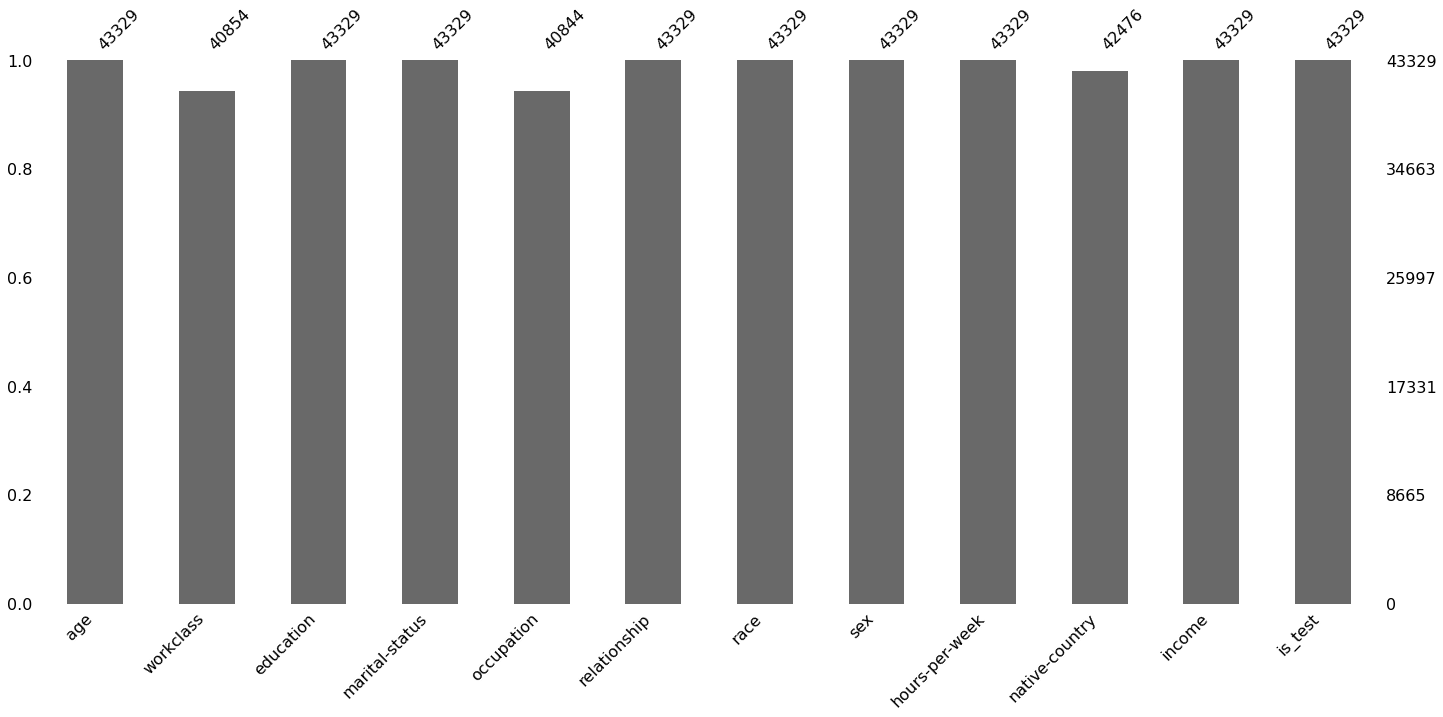

In [19]:
#visualiza a quantidade de registros nulos por atributo
msno.bar(data)

In [20]:
#total de registros nulos por atributo. 
data.isnull().sum()

age                  0
workclass         2475
education            0
marital-status       0
occupation        2485
relationship         0
race                 0
sex                  0
hours-per-week       0
native-country     853
income               0
is_test              0
dtype: int64

### Feature Engineering

#### Tratando dados faltantes
 - optaremos por três abordagens para o tratamento dos dados faltantes, visto que todos eles são categoricos.
 1. remoção dos registros que possuam pelo menos um dado faltante.
 2. preencher os dados faltantes pelo mais frequente na amostra (moda)
 3. preencher os dados faltantes por meio de um modelo de classificação (RandomForest ou LogistcRegression)
 
 - as abordagens 2 e 3 foram consideradas, uma vez que somente menos que 1% (30162/32561) da amostra possui dados faltantes.
 - para efeito de classificação, será considerada a abordagem que resultar no melhor desempenho dos modelos utilizados

In [21]:
#dropnulls | most_frequent | 
lang = "dropnulls"

match lang:
    case "dropnulls":
        data.dropna(axis=0, inplace=True)
        data.isnull().sum()
        print("nulos apagados")

    case "most_frequent":
        impute_mode = SimpleImputer(strategy = 'most_frequent')
        impute_mode.fit(data[['workclass', 'occupation','native-country']])
        data[['workclass', 'occupation','native-country']] = impute_mode.transform(df[['workclass', 'occupation','native-country']])
        print("nulos preenchidos com os registros mais frequentes")

    case _:
        # To perform KNN imputation, we need to normalize the input data and perform One Hot Encoding to categorical variables
        #from sklearn.impute import KNNImputer
        #imputer = KNNImputer(n_neighbors = 3)
        #df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)
        #X = df.drop("workclass", axis=1).values
        #Y = df["workclass"].values
        #X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
        #forest = RandomForestClassifier(n_estimators=45, max_depth=25, random_state=False, max_features=0.6, min_samples_leaf=3, n_jobs=-1)
        #forest.fit(X_train, Y_train)
        print("nenhuma das opções válidas")

nulos apagados


<AxesSubplot:>

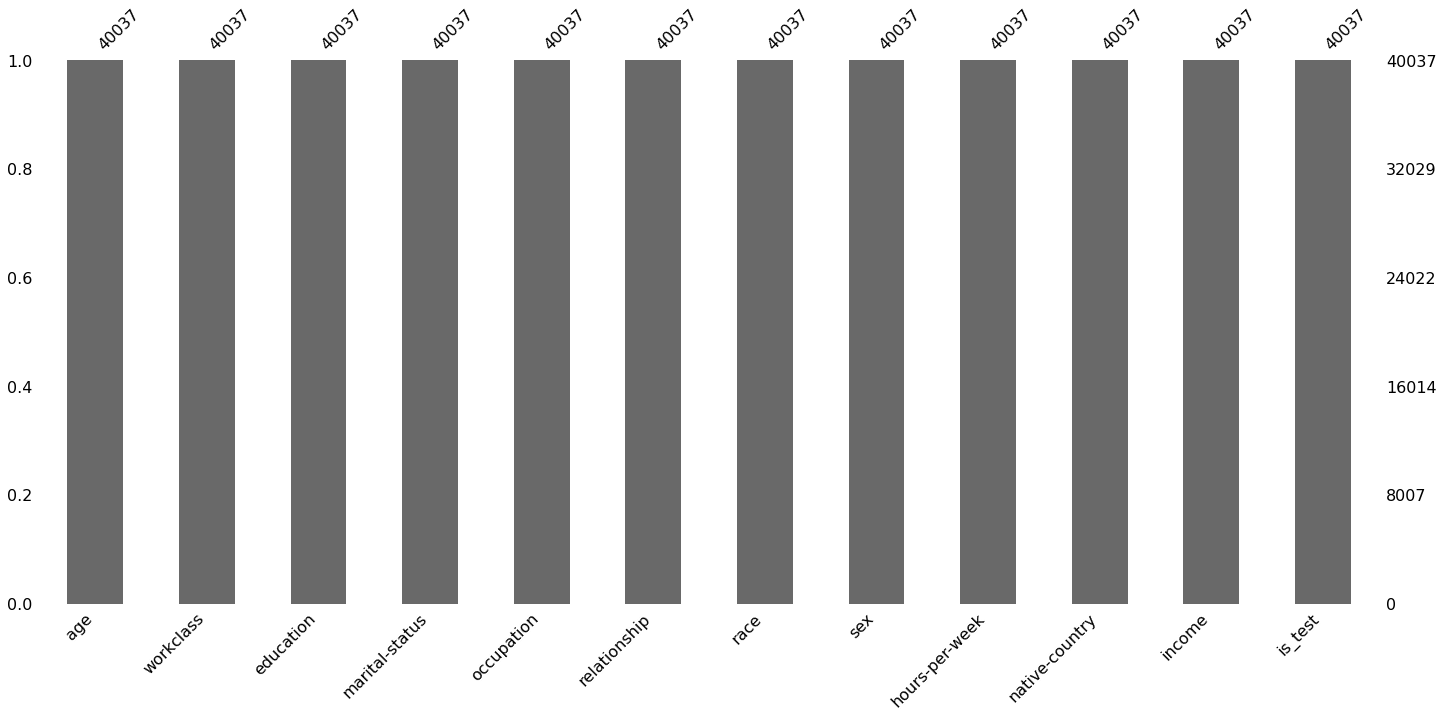

In [22]:
msno.bar(data)

#### Reestruturando atributos

In [23]:
data['fromUS'] = (data['native-country'] == 'United-States').astype(int)
data = data.drop('native-country', axis=1)

#### Registros de classificação impossível

In [24]:
all_columns = data.columns.tolist()
#exclui as variáveis target e de separação das amostras
predictor_columns = list(set(all_columns).difference([target_column,'is_test']))   
column_frequency = (data
    .groupby(predictor_columns, as_index=False)
    .agg({target_column: 'nunique'}))

column_frequency[column_frequency.income > 1].shape[0]

1347

In [25]:
#exemplo de um dos registros de treino impossível de classificar
impossible = data[(data['sex']=='Female') & (data['education']=='Assoc-acdm') & (data['workclass']=='Private') \
         & (data['marital-status']=='Divorced') & (data['occupation']=='Exec-managerial') \
         & (data['hours-per-week']==40)& (data['age']==40)& (data['marital-status']=='Divorced') ]
impossible

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,income,is_test,fromUS
13770,40,Private,Assoc-acdm,Divorced,Exec-managerial,Not-in-family,White,Female,40,0,0,1
26957,40,Private,Assoc-acdm,Divorced,Exec-managerial,Not-in-family,White,Female,40,1,0,1


In [26]:
predictor_columns

['age',
 'fromUS',
 'relationship',
 'sex',
 'occupation',
 'marital-status',
 'hours-per-week',
 'education',
 'race',
 'workclass']

In [27]:
data = data.drop_duplicates(subset=predictor_columns, keep=False)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33543 entries, 0 to 16280
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             33543 non-null  int64 
 1   workclass       33543 non-null  object
 2   education       33543 non-null  object
 3   marital-status  33543 non-null  object
 4   occupation      33543 non-null  object
 5   relationship    33543 non-null  object
 6   race            33543 non-null  object
 7   sex             33543 non-null  object
 8   hours-per-week  33543 non-null  int64 
 9   income          33543 non-null  int32 
 10  is_test         33543 non-null  int64 
 11  fromUS          33543 non-null  int32 
dtypes: int32(2), int64(3), object(7)
memory usage: 3.1+ MB


In [29]:
train_data, test_data = deduplicate(data)

In [30]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11067 entries, 0 to 16280
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             11067 non-null  int64   
 1   workclass       11067 non-null  category
 2   education       11067 non-null  category
 3   marital-status  11067 non-null  category
 4   occupation      11067 non-null  category
 5   relationship    11067 non-null  category
 6   race            11067 non-null  category
 7   sex             11067 non-null  category
 8   hours-per-week  11067 non-null  int64   
 9   income          11067 non-null  int32   
 10  fromUS          11067 non-null  int32   
dtypes: category(7), int32(2), int64(2)
memory usage: 424.1 KB


In [31]:
data = data.reindex(columns=predictor_columns)

In [32]:
print("Total registros: {:d}, Treino: {:03d} e Teste: {:d}".format(data.shape[0], train_data.shape[0],test_data.shape[0]))

Total registros: 33543, Treino: 22476 e Teste: 11067


#### Identifica as covariáveis categóricas  e numéricas

In [33]:
# Armazena os atributos categóricos dentre os atributos preditores
cat_col=[]
for i in train_data.columns:
    if train_data[i].dtype=='category':
        cat_col.append(i)
cat_col

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex']

In [34]:
# Armazena os atributos numéricos dentre os atributos preditores
num_col=[]
for colname, column_series in train_data._get_numeric_data().items():
    num_col.append(colname)
    
num_col.remove(target_column)
num_col  

['age', 'hours-per-week', 'fromUS']

#### Encoding

In [35]:
def get_categorical_columns(data, cat_columns=None, fillna=True):
    if cat_columns is None:
        cat_data = data.select_dtypes('category')
    else:
        cat_data = data[cat_columns]

    if fillna:
        for colname, series in cat_data.iteritems():
            if 'Other' not in series.cat.categories:
                series = series.cat.add_categories(['Other'])

            cat_data[colname] = series.fillna('Other')
            
    return cat_data

In [36]:
#https://pythonsimplified.com/difference-between-onehotencoder-and-get_dummies/
def features_with_one_hot_encoded_categories(data, num_columns, cat_columns=None, fillna=True):
    #numerical_data = data[num_columns]
    cat_data = data[cat_columns]
    one_hot_data = pd.get_dummies(cat_data) #trocar por onehot com objeto instanciado fora da função e chamado aqui. 
    df = pd.concat([data, one_hot_data], axis=1)
    
    features = num_columns + one_hot_data.columns.tolist()

    X = df[features].fillna(0).values.astype(float)
    y = df[target_column].values
    
    return X, y

In [37]:
def features_with_labeled_categories(data, num_columns, cat_columns=None, fillna=True):
    #cat_data = get_categorical_columns(data, cat_columns, fillna)
    cat_data = data[cat_columns]
    cat_labeled_data = cat_data.apply(lambda x: x.cat.codes)
    
    numerical_data = data[num_columns]
    
    if fillna:
        numerical_data = numerical_data.fillna(0)
    
    X = np.concatenate([
        numerical_data.values.astype(float),
        cat_labeled_data.values,
    ], axis=1)
    y = data[target_column].values

    feature_names = num_columns + cat_data.columns.tolist()
    return X, y, feature_names

### Aplicação Modelos

#### KNN

- https://www.analyticsvidhya.com/blog/2021/01/a-quick-introduction-to-k-nearest-neighbor-knn-classification-using-python/
- https://www.linkedin.com/pulse/categorical-features-encoding-decision-trees-knn-sravan-malla-/ (sobre o uso de labeled or -one_hot_encoded for categories features.
- https://www.analyticsvidhya.com/blog/2022/06/is-adult-income-dataset-imbalanced/ (sobre esse dataset esta desbalanceado)
- https://www.kdnuggets.com/2020/11/most-popular-distance-metrics-knn.html

In [38]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 38, metric = 'minkowski', p = 2) #Minkowski 

In [39]:
#X, y, feature_names = features_with_labeled_categories(train_data, num_col,cat_col)
X, y = features_with_one_hot_encoded_categories(train_data, num_col,cat_col)

In [40]:
X.shape

(22476, 60)

Fold #1
ROC AUC score : 0.875
Kappa score   : 0.510
F1 score      : 0.609
Accuracy      : 0.841
------------------------------
Fold #2
ROC AUC score : 0.870
Kappa score   : 0.503
F1 score      : 0.605
Accuracy      : 0.838
------------------------------
Fold #3
ROC AUC score : 0.877
Kappa score   : 0.511
F1 score      : 0.610
Accuracy      : 0.840
------------------------------
Fold #4
ROC AUC score : 0.865
Kappa score   : 0.504
F1 score      : 0.604
Accuracy      : 0.839
------------------------------

ROC AUC médio entre os folds  : 0.872
Kappa médio entre os folds    : 0.507
F1 médio entre os folds       : 0.607
Acurácia média entre os folds : 0.840


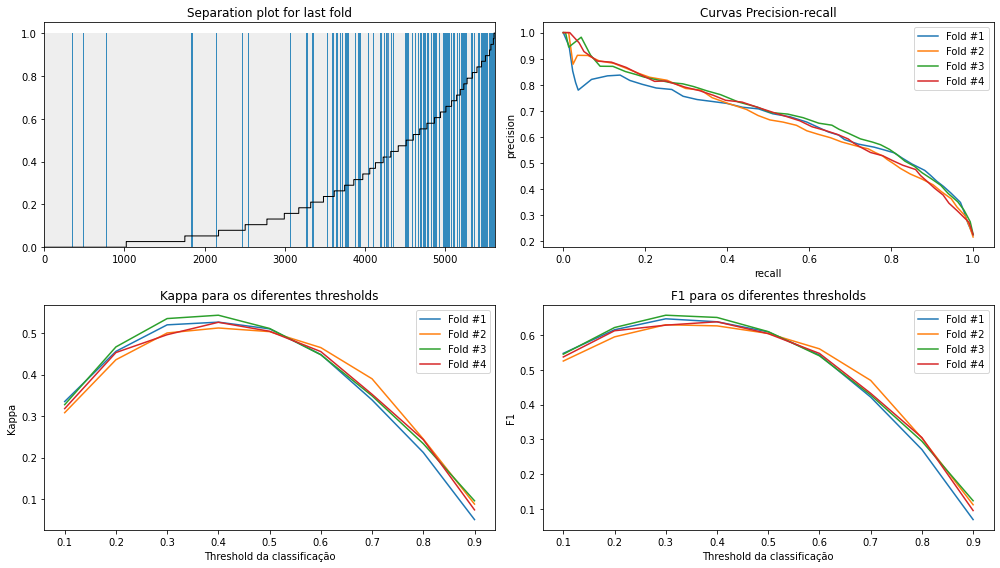

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
validate_model(model, X, y)

Fold #1
ROC AUC score : 0.858
Kappa score   : 0.497
F1 score      : 0.590
Accuracy      : 0.845
------------------------------
Fold #2
ROC AUC score : 0.854
Kappa score   : 0.452
F1 score      : 0.554
Accuracy      : 0.830
------------------------------
Fold #3
ROC AUC score : 0.858
Kappa score   : 0.436
F1 score      : 0.539
Accuracy      : 0.828
------------------------------
Fold #4
ROC AUC score : 0.865
Kappa score   : 0.460
F1 score      : 0.554
Accuracy      : 0.840
------------------------------

ROC AUC médio entre os folds  : 0.859
Kappa médio entre os folds    : 0.461
F1 médio entre os folds       : 0.559
Acurácia média entre os folds : 0.836


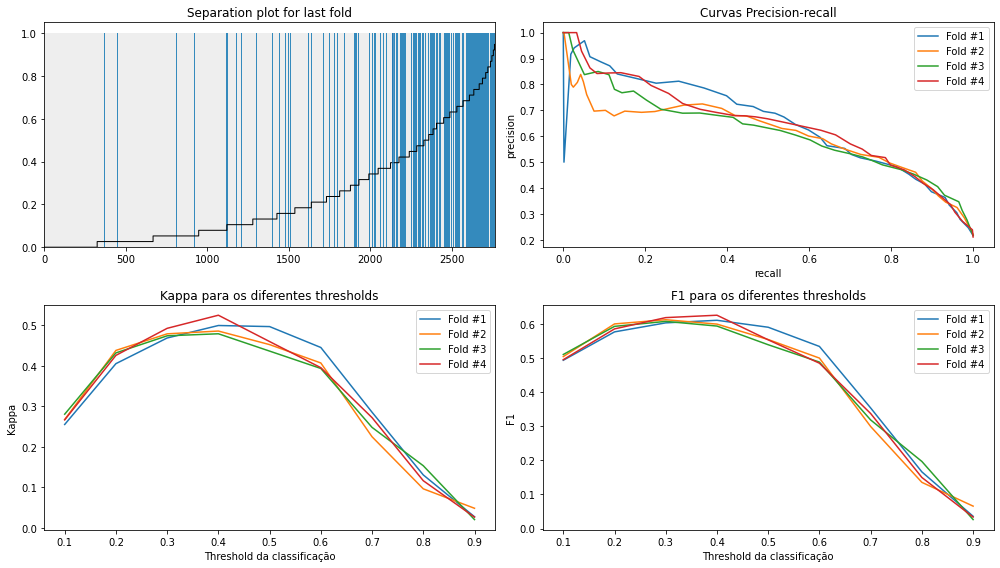

In [42]:
#X_test, y_test, feature_names = features_with_labeled_categories(test_data, num_col,cat_col)
X_test, y_test = features_with_one_hot_encoded_categories(test_data, num_col,cat_col)
X_test = sc.fit_transform(X_test)
validate_model(model, X_test, y_test)

In [43]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(X, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50)})

In [44]:
gridsearch.best_params_

{'n_neighbors': 38}

Fold #1
ROC AUC score : 0.873
Kappa score   : 0.512
F1 score      : 0.611
Accuracy      : 0.840
------------------------------
Fold #2
ROC AUC score : 0.868
Kappa score   : 0.505
F1 score      : 0.607
Accuracy      : 0.836
------------------------------
Fold #3
ROC AUC score : 0.874
Kappa score   : 0.503
F1 score      : 0.603
Accuracy      : 0.839
------------------------------
Fold #4
ROC AUC score : 0.877
Kappa score   : 0.515
F1 score      : 0.614
Accuracy      : 0.842
------------------------------

ROC AUC médio entre os folds  : 0.873
Kappa médio entre os folds    : 0.508
F1 médio entre os folds       : 0.609
Acurácia média entre os folds : 0.839


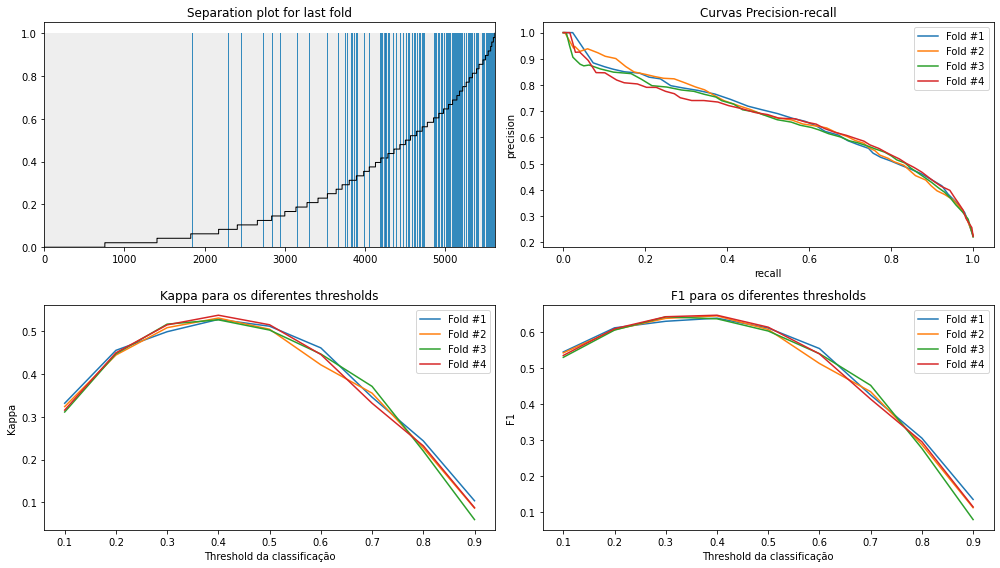

In [45]:
validate_model(gridsearch, X, y)
#train_preds_grid = gridsearch.predict(X_train)
#test_preds_grid = gridsearch.predict(X_test)

Fold #1
ROC AUC score : 0.861
Kappa score   : 0.461
F1 score      : 0.561
Accuracy      : 0.833
------------------------------
Fold #2
ROC AUC score : 0.850
Kappa score   : 0.421
F1 score      : 0.525
Accuracy      : 0.826
------------------------------
Fold #3
ROC AUC score : 0.864
Kappa score   : 0.470
F1 score      : 0.566
Accuracy      : 0.840
------------------------------
Fold #4
ROC AUC score : 0.862
Kappa score   : 0.503
F1 score      : 0.598
Accuracy      : 0.843
------------------------------

ROC AUC médio entre os folds  : 0.859
Kappa médio entre os folds    : 0.464
F1 médio entre os folds       : 0.562
Acurácia média entre os folds : 0.835


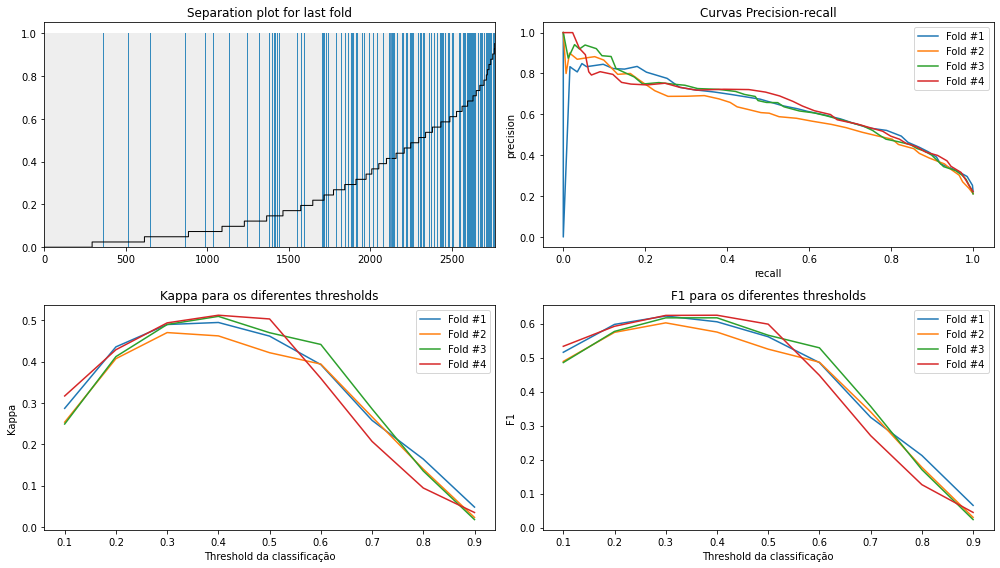

In [46]:
validate_model(gridsearch, X_test, y_test)

####  Neural Network

#### Linear model

The first model prototype will be build using logistic regression. This algorithm easier to debug and anylise. In addition, it provides good banchmark for future imrovements.

 **with only 3 numerical features**
 - age
 - hours-per-week
 - fromUS

Fold #1
ROC AUC score : 0.723
Kappa score   : 0.070
F1 score      : 0.133
Accuracy      : 0.776
------------------------------
Fold #2
ROC AUC score : 0.729
Kappa score   : 0.071
F1 score      : 0.136
Accuracy      : 0.771
------------------------------
Fold #3
ROC AUC score : 0.726
Kappa score   : 0.073
F1 score      : 0.132
Accuracy      : 0.770
------------------------------
Fold #4
ROC AUC score : 0.713
Kappa score   : 0.065
F1 score      : 0.131
Accuracy      : 0.768
------------------------------

ROC AUC médio entre os folds  : 0.723
Kappa médio entre os folds    : 0.070
F1 médio entre os folds       : 0.133
Acurácia média entre os folds : 0.771


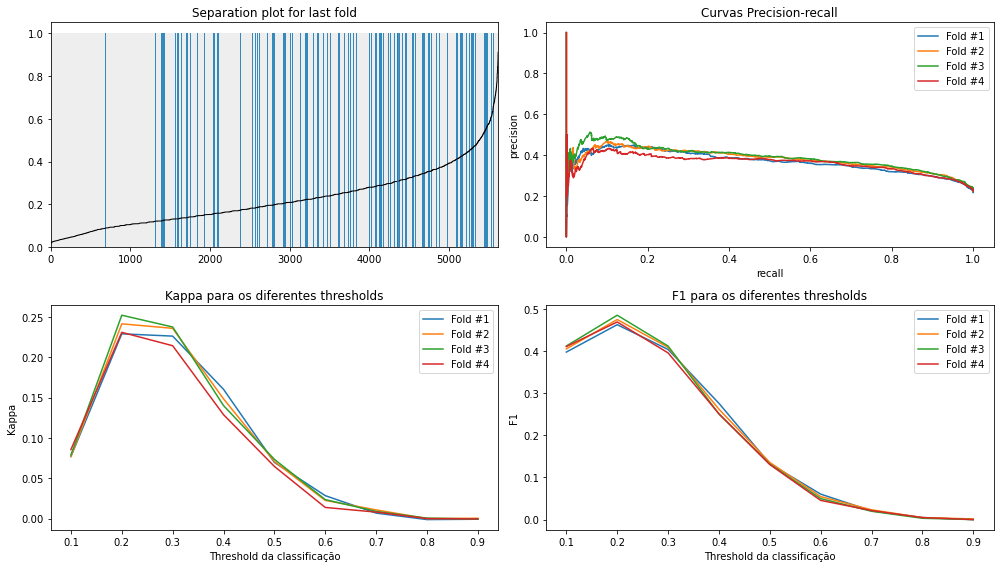

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

X = train_data[num_col].values.astype(float)
y = train_data[target_column].values

model = Pipeline([
    # Scaling allows us to normalize variables. It will
    # make models coeficients interpratable.
    ('normalizer', StandardScaler()),
    ('classifier', LogisticRegression()),
])
validate_model(model, X, y)

Only 3 numerical columns give prediction with ROC AUC score almost equal to 0.8, which is a good start. On the other hand kappa and f1 scores are low. These score depend on the 0.5 threshold (unlike ROC AUC score) and it's just a bad choice for class separation. From the two lower plots we can see that F1 and Kappa scores can be improved if we pick threshold equal to 0.3.

In [48]:
predictor_columns

['age',
 'fromUS',
 'relationship',
 'sex',
 'occupation',
 'marital-status',
 'hours-per-week',
 'education',
 'race',
 'workclass']

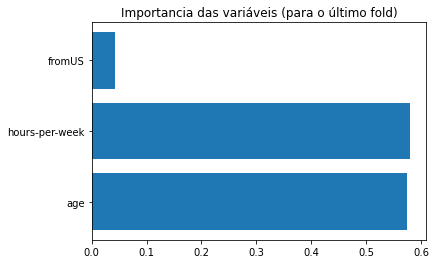

In [49]:
check_feature_importance(
    linear_classifier=model.named_steps['classifier'],
    feature_names=num_col,
)

#### Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier
X, y = features_with_one_hot_encoded_categories(train_data, num_col,cat_col)
model = DecisionTreeClassifier(
    min_samples_leaf=200,
    criterion='entropy',
)

In [51]:
X.shape

(22476, 60)

Fold #1
ROC AUC score : 0.868
Kappa score   : 0.467
F1 score      : 0.572
Accuracy      : 0.830
------------------------------
Fold #2
ROC AUC score : 0.865
Kappa score   : 0.462
F1 score      : 0.571
Accuracy      : 0.825
------------------------------
Fold #3
ROC AUC score : 0.869
Kappa score   : 0.458
F1 score      : 0.567
Accuracy      : 0.823
------------------------------
Fold #4
ROC AUC score : 0.868
Kappa score   : 0.476
F1 score      : 0.583
Accuracy      : 0.828
------------------------------

ROC AUC médio entre os folds  : 0.867
Kappa médio entre os folds    : 0.466
F1 médio entre os folds       : 0.573
Acurácia média entre os folds : 0.826


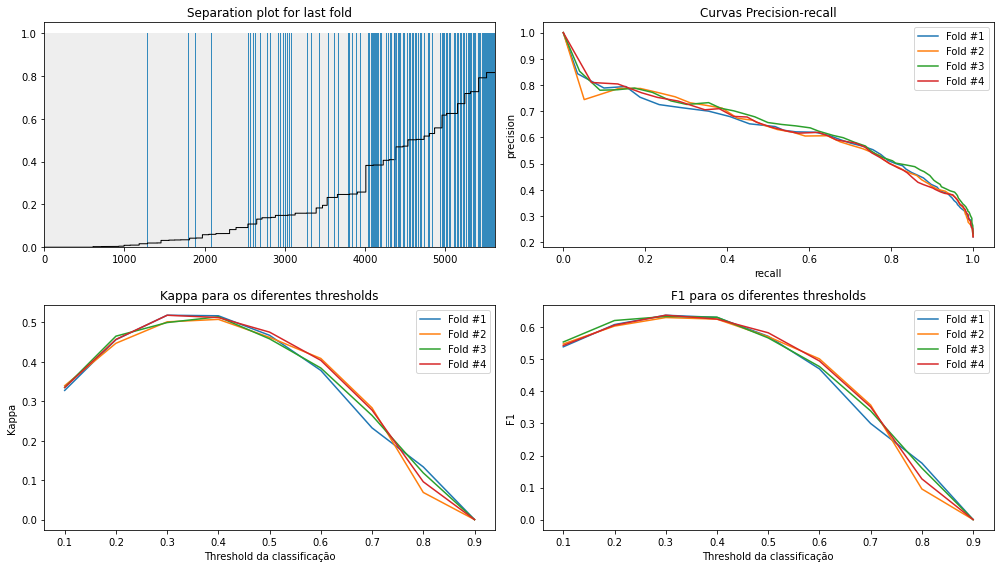

In [52]:
validate_model(model, X, y)

Fold #1
ROC AUC score : 0.865
Kappa score   : 0.477
F1 score      : 0.579
Accuracy      : 0.833
------------------------------
Fold #2
ROC AUC score : 0.868
Kappa score   : 0.462
F1 score      : 0.565
Accuracy      : 0.830
------------------------------
Fold #3
ROC AUC score : 0.859
Kappa score   : 0.421
F1 score      : 0.535
Accuracy      : 0.813
------------------------------
Fold #4
ROC AUC score : 0.866
Kappa score   : 0.474
F1 score      : 0.577
Accuracy      : 0.832
------------------------------

ROC AUC médio entre os folds  : 0.864
Kappa médio entre os folds    : 0.458
F1 médio entre os folds       : 0.564
Acurácia média entre os folds : 0.827


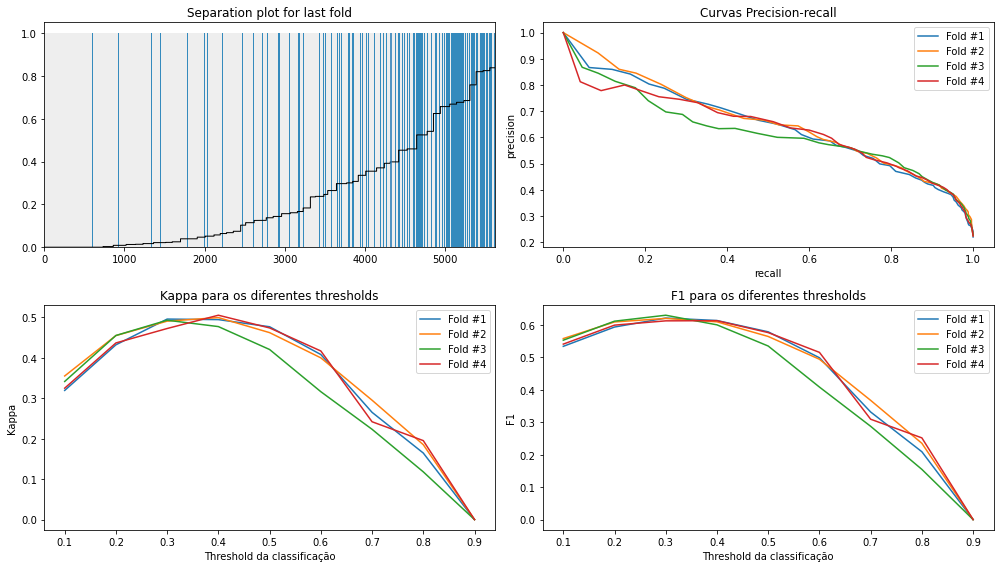

In [53]:
from sklearn.tree import DecisionTreeClassifier

X, y, feature_names = features_with_labeled_categories(train_data, num_col,cat_col)
model = DecisionTreeClassifier(
    min_samples_leaf=200,
    criterion='entropy',
)
validate_model(model, X, y)

#### Gradient Boosted Trees

C:\Users\cazev\miniconda3\envs\cashme\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fold #1
ROC AUC score : 0.894
Kappa score   : 0.551
F1 score      : 0.643
Accuracy      : 0.853
------------------------------


C:\Users\cazev\miniconda3\envs\cashme\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fold #2
ROC AUC score : 0.891
Kappa score   : 0.530
F1 score      : 0.627
Accuracy      : 0.844
------------------------------


C:\Users\cazev\miniconda3\envs\cashme\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fold #3
ROC AUC score : 0.894
Kappa score   : 0.544
F1 score      : 0.635
Accuracy      : 0.853
------------------------------


C:\Users\cazev\miniconda3\envs\cashme\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fold #4
ROC AUC score : 0.899
Kappa score   : 0.565
F1 score      : 0.658
Accuracy      : 0.854
------------------------------

ROC AUC médio entre os folds  : 0.895
Kappa médio entre os folds    : 0.547
F1 médio entre os folds       : 0.641
Acurácia média entre os folds : 0.851


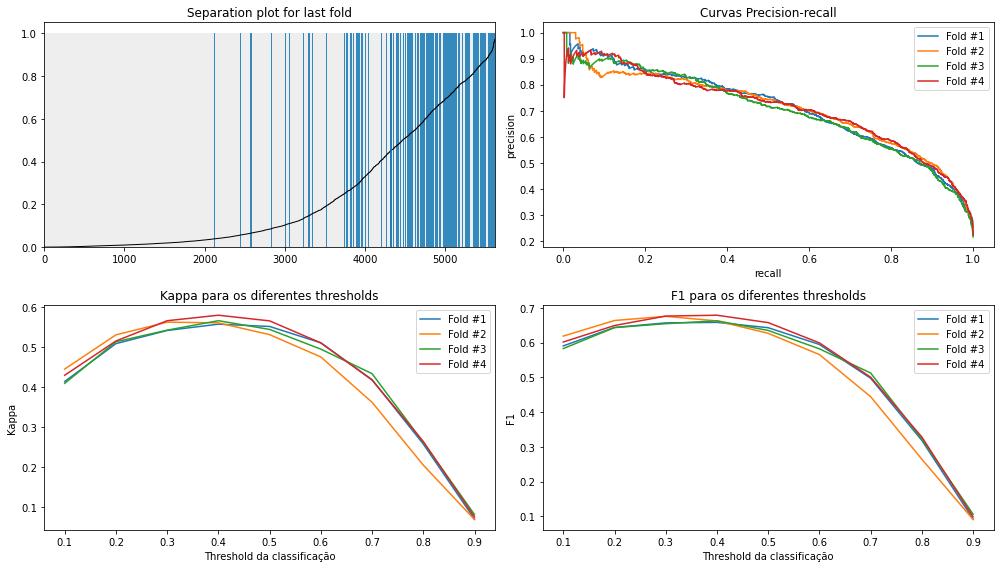

In [54]:
X, y = features_with_one_hot_encoded_categories(train_data, num_col,cat_col)
# Looks like default values give good enough result improvements
model = lgb.LGBMClassifier()
validate_model(model, X, y)

### Evaluating test dataset

In [55]:
n_train_samples = len(train_data)
fold_metrics = defaultdict(list)
# In every model probability threshold 0.3 and 0.4 showed best results
# For this reason we will use one threshold equal to 0.35
thresholds = np.array([0.35])
data = pd.concat([train_data, test_data], ignore_index=True)
X, y, feature_names = features_with_labeled_categories(data, num_col,cat_col)
X_train, y_train = X[:n_train_samples], y[:n_train_samples]
X_test, y_test = X[n_train_samples:], y[n_train_samples:]

In [56]:
len(X_test)

11067

In [57]:
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

y_predicted_probas = model.predict_proba(X_test)
y_predicted_proba = y_predicted_probas[:, 1]

collect_metrics(fold_metrics, y_test, y_predicted_proba, thresholds)
print_last_fold_stats(fold_metrics)

ROC AUC score : 0.890
Kappa score   : 0.533
F1 score      : 0.626
Accuracy      : 0.850


## Analyze models decisions

In [58]:
import shap
shap.initjs()

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


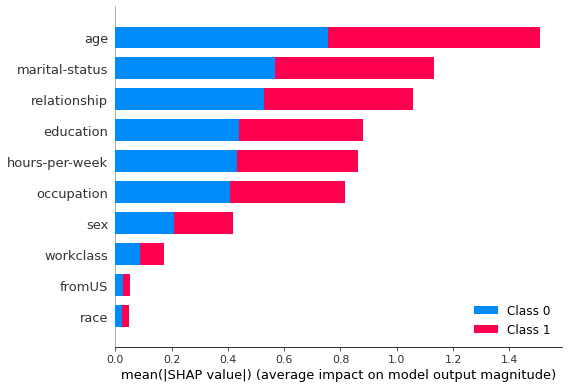

In [59]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, feature_names)

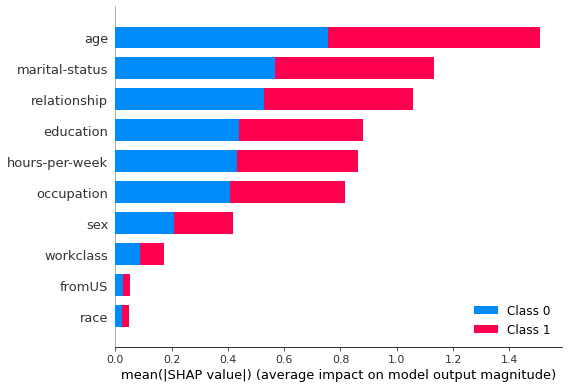

In [60]:
shap.summary_plot(shap_values, X, feature_names, plot_type='bar')

Observations:

The education column mostly duplicates information obtained from the education_num column, that's probably why it has low impact.

Native country contains mostly US and other countries probably don't have large impact on the outcome.

Race also looks like a strange variable to use for outcome prediction.

In [61]:
#svc.score(X_train,y_train)

In [62]:
#svc_pred = svc.predict(X_test)
#accuracy_score(y_test,svc_pred)

Hyperparameter Tunning

In [63]:
#params = dict(kernel=['linear', 'poly'],C=[1,0.1,0.01])
#Grid_model = GridSearchCV(svc,params,n_jobs=-1)
#Grid_model.fit(X_train,y_train)
#Grid_model.best_params_

In [64]:
best_model = SVC(kernel='poly',gamma='scale',C=1).fit(X_train,y_train)

In [65]:
best_model.score(X_train,y_train)

0.7761167467520911

In [66]:
best_pred = best_model.predict(X_test)

In [67]:
accuracy_score(y_test,best_pred)

0.7833197795247131